In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize_scalar
from scipy.interpolate import interp1d

In [5]:
# ------------------------------
# Parameters
# ------------------------------
T = 1.0
N_t = 80
dt = T / N_t

S0 = 100.0
sigma = 0.2
alpha = 0.05
r = 0.03
K = 100.0
gamma = 0.5
lambda_tc = 0.01

pi_vals = np.linspace(-2, 2, 100)

u = np.exp(sigma * np.sqrt(dt))
d = np.exp(-sigma * np.sqrt(dt))
p = (np.exp(alpha * dt) - d) / (u - d)

# ------------------------------
# Wealth Grid
# ------------------------------
W_min, W_max = 1e-3, 100.0
N_W = 1500
W_grid = np.linspace(W_min, W_max, N_W)

# ------------------------------
# Utility Function
# ------------------------------
def utility(x):
    return max(x,1e-8)**gamma / gamma if x > 0 else -1e12

# ------------------------------
# Interpolation Helper
# ------------------------------
def interp_value(W_new, grid, values):
    return np.interp(W_new, grid, values)

# 1 No transaction costs

## 1.1 No transaction costs and no option

Processing time step 79 of 78...
Processing time step 78 of 77...
Processing time step 77 of 76...
Processing time step 76 of 75...
Processing time step 75 of 74...
Processing time step 74 of 73...
Processing time step 73 of 72...
Processing time step 72 of 71...
Processing time step 71 of 70...
Processing time step 70 of 69...
Processing time step 69 of 68...
Processing time step 68 of 67...
Processing time step 67 of 66...
Processing time step 66 of 65...
Processing time step 65 of 64...
Processing time step 64 of 63...
Processing time step 63 of 62...
Processing time step 62 of 61...
Processing time step 61 of 60...
Processing time step 60 of 59...
Processing time step 59 of 58...
Processing time step 58 of 57...
Processing time step 57 of 56...
Processing time step 56 of 55...
Processing time step 55 of 54...
Processing time step 54 of 53...
Processing time step 53 of 52...
Processing time step 52 of 51...
Processing time step 51 of 50...
Processing time step 50 of 49...
Processing

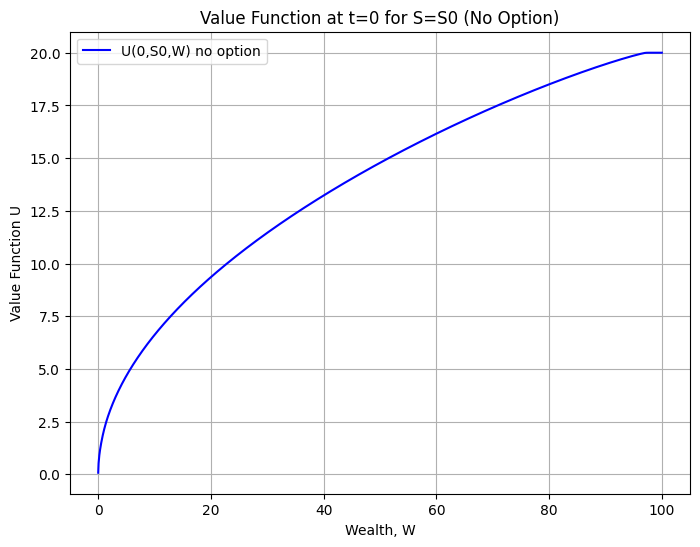

In [ ]:
# ==============================
# Part 1: No Transaction Costs
# ==============================

# ------------------------------
# Terminal Utility without Option
# ------------------------------
def terminal_utility_no_option(S):
    return np.array([utility(W) for W in W_grid])

# ------------------------------
# Dynamic Programming Solver (No Transaction Costs, No Option)
# ------------------------------

def solve_dp_no_transaction_cost(terminal_utility_func):
    U = {}
    Pi = {}

    for i in range(N_t + 1):
        S_val = S0 * (u**i) * (d**(N_t - i))
        U[(N_t, i)] = terminal_utility_func(S_val)
        Pi[(N_t, i)] = np.zeros(N_W)

    for n in reversed(range(N_t)):
        for i in range(n + 1):
            S_val = S0 * (u**i) * (d**(n - i))
            U_val = np.zeros(N_W)
            Pi_val = np.zeros(N_W)

            for j, W in enumerate(W_grid):
                def objective_pi(pi):
                    W_up = W * (1 + r * dt + pi * ((alpha - r) * dt + sigma * np.sqrt(dt)))
                    W_down = W * (1 + r * dt + pi * ((alpha - r) * dt - sigma * np.sqrt(dt)))
                    U_up = interp_value(W_up, W_grid, U[(n+1, i+1)])
                    U_down = interp_value(W_down, W_grid, U[(n+1, i)])

                    expected_U = p * U_up + (1 - p) * U_down
                    return -expected_U  

                res = minimize_scalar(
                    objective_pi,
                    bounds=(-2, 2), 
                    method='bounded'
                )

                Pi_val[j] = res.x
                U_val[j] = -res.fun  

            U[(n, i)] = U_val
            Pi[(n, i)] = Pi_val
        print(f"Processing time step {n} of {N_t-1}...")

    return U, Pi

# ------------------------------
# Solve and Plot (No Option)
# ------------------------------
U_no_opt, Pi_no_opt = solve_dp_no_transaction_cost(terminal_utility_no_option)

plt.figure(figsize=(8, 6))
plt.plot(W_grid, U_no_opt[(0, 0)], 'b-', label="U(0,S0,W) no option")
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Value Function at t=0 for S=S0 (No Option)")
plt.legend()
plt.grid(True)
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_4195/1525174986.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(W_grid, Pi_no_opt[(0, 0)], 'b-', label="$\pi$(0,S0,W) no option")
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_4195/1525174986.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(W_grid,Pi_theo[:,0],'r-', label='$\pi$ theoretical')


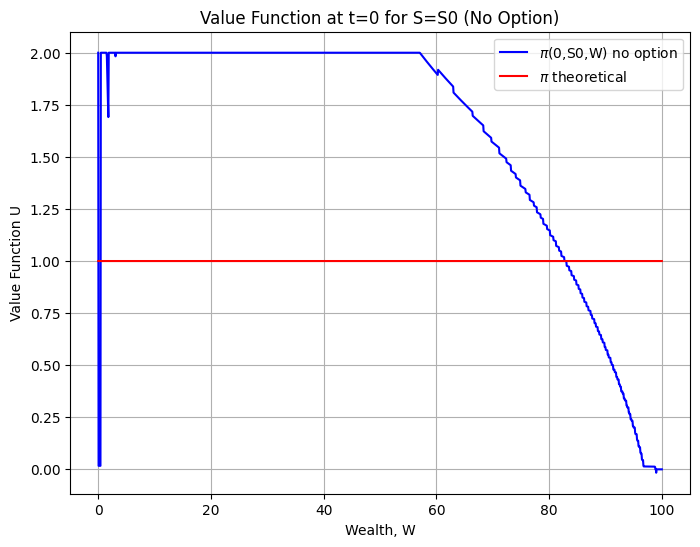

In [22]:
Pi_theo = np.full((N_W,N_t),(alpha-r)/(sigma**2*(1-gamma))) 


plt.figure(figsize=(8, 6))
plt.plot(W_grid, Pi_no_opt[(0, 0)], 'b-', label="$\pi$(0,S0,W) no option")
plt.plot(W_grid,Pi_theo[:,0],'r-', label='$\pi$ theoretical')
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Value Function at t=0 for S=S0 (No Option)")
plt.legend()
plt.grid(True)
plt.show()

## 1.2 No transaction costs and option

Processing time step 79 of 78...
Processing time step 78 of 77...
Processing time step 77 of 76...
Processing time step 76 of 75...
Processing time step 75 of 74...
Processing time step 74 of 73...
Processing time step 73 of 72...
Processing time step 72 of 71...
Processing time step 71 of 70...
Processing time step 70 of 69...
Processing time step 69 of 68...
Processing time step 68 of 67...
Processing time step 67 of 66...
Processing time step 66 of 65...
Processing time step 65 of 64...
Processing time step 64 of 63...
Processing time step 63 of 62...
Processing time step 62 of 61...
Processing time step 61 of 60...
Processing time step 60 of 59...
Processing time step 59 of 58...
Processing time step 58 of 57...
Processing time step 57 of 56...
Processing time step 56 of 55...
Processing time step 55 of 54...
Processing time step 54 of 53...
Processing time step 53 of 52...
Processing time step 52 of 51...
Processing time step 51 of 50...
Processing time step 50 of 49...
Processing

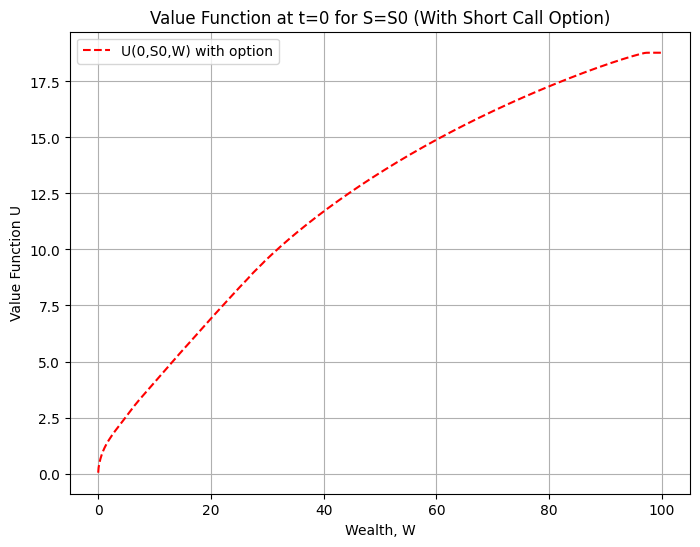

In [9]:
# ------------------------------
# Terminal Utility with Option
# ------------------------------

def terminal_utility_with_option(S):
    payoff = max(S - K, 0.0)
    return np.array([utility(max(W - payoff, 1e-8)) for W in W_grid])

# ------------------------------
# Solve and Plot (With Option)
# ------------------------------
U_with_opt, Pi_with_opt = solve_dp_no_transaction_cost(terminal_utility_with_option)

plt.figure(figsize=(8, 6))
plt.plot(W_grid, U_with_opt[(0, 0)], 'r--', label="U(0,S0,W) with option")
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Value Function at t=0 for S=S0 (With Short Call Option)")
plt.legend()
plt.grid(True)
plt.show()


## 1.3 Indifference pricing

In [15]:
# ------------------------------
# Black-Scholes Call Price Function
# ------------------------------
def call_price(t, S, T, r, sigma, K):
    tau = T - t
    if tau < 1e-8:
        return max(S - K, 0)
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*tau) / (sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)
    return S * norm.cdf(d1) - K * np.exp(-r*tau) * norm.cdf(d2)

def Delta(t, S, T, r, sigma, K):
    tau = T-t 
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*tau) / (sigma*np.sqrt(tau))
    return norm.cdf(d1)

Optimal C (Indifference price) = 8.48075189124118
Black-Scholes price = 9.413403383853016
Delta Black-Scholes = 0.5987063256829237


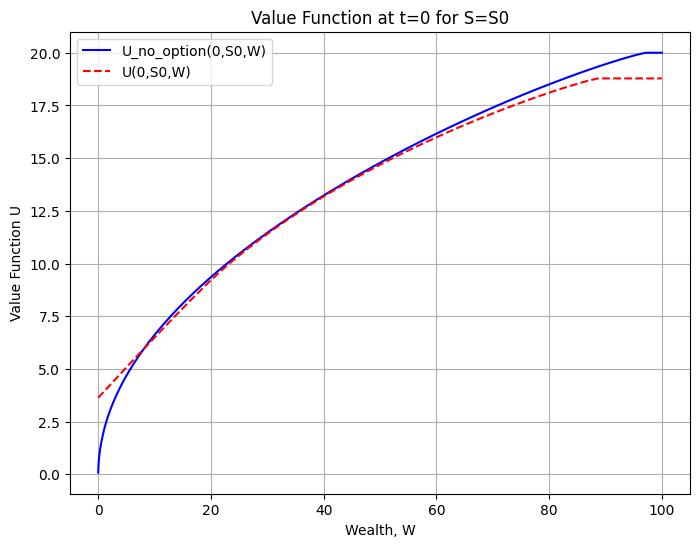

In [16]:
# ------------------------------
# Indifference Pricing
# ------------------------------

def shifted_utility(C):
    W_shifted = W_grid + C
    U_shifted = np.interp(W_shifted, W_grid, U_with_opt[(0, 0)])
    error = np.sqrt(np.mean((U_shifted - U_no_opt[(0, 0)])**2))
    return error

res = minimize_scalar(shifted_utility, bounds=(0, 20), method='bounded')
C_optimal = res.x
print("Optimal C (Indifference price) =", C_optimal)
print("Black-Scholes price =", call_price(0,S0,T,r,sigma,K))
print('Delta Black-Scholes =', Delta(0,S0,T,r,sigma,K))

C = C_optimal
W_shifted = W_grid + C
U_min = np.interp(W_shifted, W_grid, U_with_opt[(0, 0)])


plt.figure(figsize=(8,6))
plt.plot(W_grid, U_no_opt[(0, 0)], 'b-', label="U_no_option(0,S0,W)")
plt.plot(W_grid, U_min, 'r--', label="U(0,S0,W)")
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Value Function at t=0 for S=S0")
plt.legend()
plt.grid(True)
plt.show()


## 1.4 Comparison with theoretical values

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_4195/2898803795.py:14: RuntimeWarning: invalid value encountered in scalar power
  return g*((W-f)**gamma)/gamma


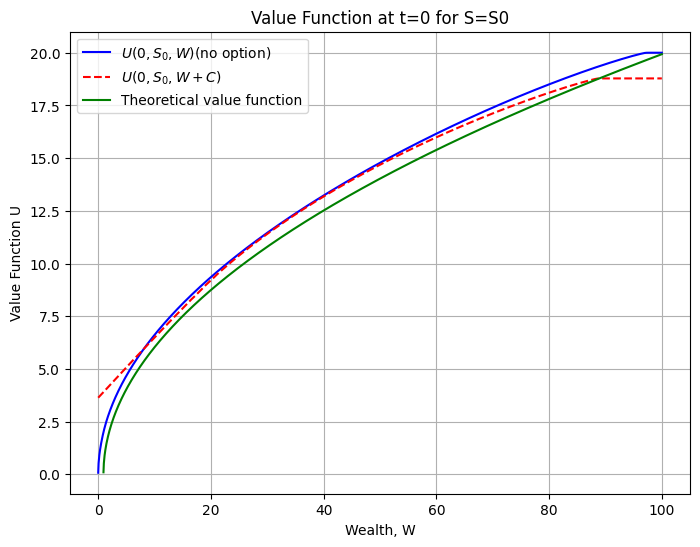

In [17]:
# ------------------------------
# Theoretical U function
# ------------------------------

def U_explicit(t,T,r,alpha,sigma,S,W,gamma,K):
    v = (1/2)*(((alpha-r)/sigma)**2)*(1/(1-gamma)) + r
    g = np.exp(v*r*(T-t))
    return g*((W)**gamma)/gamma

def U_explicit_opt(t,T,r,alpha,sigma,S,W,gamma,K):
    v = (1/2)*(((alpha-r)/sigma)**2)*(1/(1-gamma)) + r
    g = np.exp(v*r*(T-t))
    f = call_price(t, S, T, r, sigma, K)
    return g*((W-f)**gamma)/gamma

W_shifted = W_grid + C
U_theo = [U_explicit_opt(0,T,r,alpha,sigma,S0,W,gamma,K) for W in W_shifted]

plt.figure(figsize=(8,6))
plt.plot(W_grid, U_no_opt[(0, 0)], 'b-', label=r"$U(0,S_0,W)$(no option)")
plt.plot(W_grid, U_min, 'r--', label=r"$U(0,S_0,W+C)$")
plt.plot(W_grid, U_theo, 'g-', label = 'Theoretical value function')
#plt.plot(W_grid, U_with_opt[(0, 0)], 'r--', label=r"$U(0,S_0,W)$")
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Value Function at t=0 for S=S0")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# ------------------------------
# Theoretical pi values when there is no position in option
# ------------------------------

Pi_theo = np.full((N_W,N_t),(alpha-r)/(sigma**2*(1-gamma))) 

# ------------------------------
# Theoretical pi values when there is a position in option
# ------------------------------

Pi_theo_opt = {}
for n in reversed(range(N_t)):
    for i in range(n+1): 
        S_val = S0 * (u**i) * (d**(n - i))
        Price = call_price(0, S_val, (N_t-n)/N_t, r, sigma, K)  
        Delt = Delta(0, S_val, (N_t-n)/N_t, r, sigma, K)
        Pi_vals = np.zeros(N_W)
        for j, W in enumerate(W_grid):
            Pi_vals[j] = (alpha-r)/(sigma**2*(1-gamma))*((W-Price)/W)+(Price/W)*Delt
        Pi_theo_opt[(n,i)] = Pi_vals
        
# ------------------------------
# Proportion for BS Delta Hedging
# ------------------------------

Delt = Delta(0,S0,T,r,sigma,K)
Pi_delta_0 = [min((Delt*S0)/W,4) for W in W_grid] 
print('Delta Black-Scholes =', Delt)

Delta Black-Scholes = 0.5987063256829237


In [19]:
Pi_with_opt

{(80, 0): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 1): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 2): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 3): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 4): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 5): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 6): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 7): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 8): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 9): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 10): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 11): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 12): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 13): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 14): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 15): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 16): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 17): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 18): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 19): array([0., 0., 0., ..., 0., 0., 0.]),
 (80, 20): array([0., 0., 0., 

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_4195/725361175.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(W_grid, Pi_with_opt[(0, 0)], label='$\pi$ with option', lw=2)
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_4195/725361175.py:3: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(W_grid, Pi_theo_opt[(0,0)], label="$\pi$ with option (theoretical)")
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_4195/725361175.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(W_grid, Pi_delta_0, label = '$\pi$ from BS Delta Hedging')


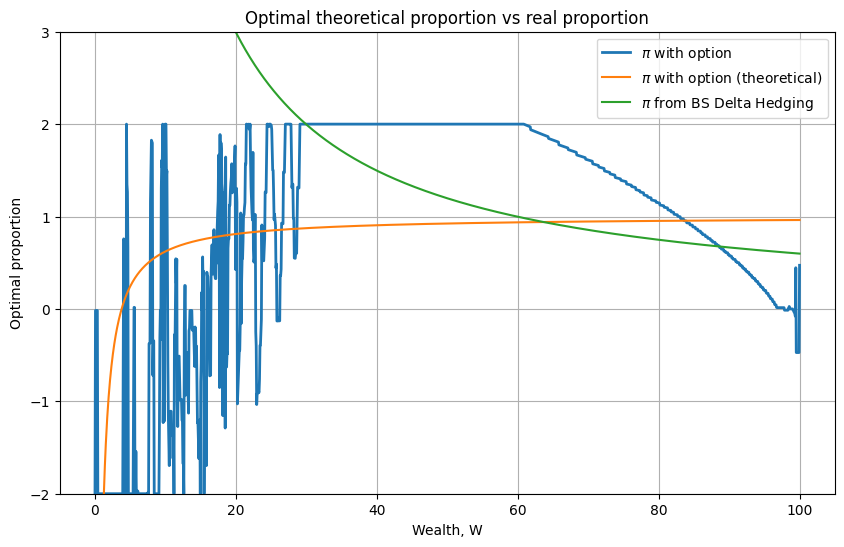

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(W_grid, Pi_with_opt[(0, 0)], label='$\pi$ with option', lw=2)
plt.plot(W_grid, Pi_theo_opt[(0,0)], label="$\pi$ with option (theoretical)")
plt.plot(W_grid, Pi_delta_0, label = '$\pi$ from BS Delta Hedging')
plt.xlabel("Wealth, W")
plt.ylabel("Optimal proportion")
plt.ylim((-2,3))
plt.title("Optimal theoretical proportion vs real proportion")
plt.legend()
plt.grid(True)
plt.show()

## 1.5 Trying with different values 

In [94]:
# ---------------------------
# Parameters to twitch 
# ---------------------------
alpha = 0.05
K = 100.0
lambda_tc = 0.01
pi_vals = np.linspace(-3, 4, 100)


Optimal C (Indifference price) = 7.676162037612947
Black-Scholes price = 9.413403383853016
Delta Black-Scholes = 0.5987063256829237


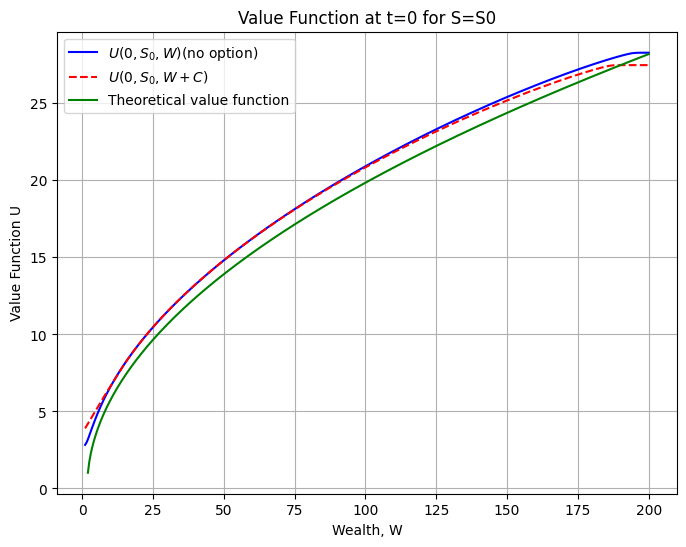

In [95]:
U_no_opt, Pi_no_opt = solve_dp_no_transaction_cost(terminal_utility_no_option)
U_with_opt, Pi_with_opt = solve_dp_no_transaction_cost(terminal_utility_with_option)
def shifted_utility(C):
    W_shifted = W_grid + C
    U_shifted = np.interp(W_shifted, W_grid, U_with_opt[(0, 0)])
    error = np.sqrt(np.mean((U_shifted - U_no_opt[(0, 0)])**2))
    return error
res = minimize_scalar(shifted_utility, bounds=(0, 20), method='bounded')
C_optimal = res.x
print("Optimal C (Indifference price) =", C_optimal)
print("Black-Scholes price =", call_price(0,S0,T,r,sigma,K))
print('Delta Black-Scholes =', Delta(0,S0,T,r,sigma,K))
C = C_optimal
W_shifted = W_grid + C
U_min = np.interp(W_shifted, W_grid, U_with_opt[(0, 0)])

plt.figure(figsize=(8,6))
plt.plot(W_grid, U_no_opt[(0, 0)], 'b-', label=r"$U(0,S_0,W)$(no option)")
plt.plot(W_grid, U_min, 'r--', label=r"$U(0,S_0,W+C)$")
plt.plot(W_grid, U_theo, 'g-', label = 'Theoretical value function')
#plt.plot(W_grid, U_with_opt[(0, 0)], 'r--', label=r"$U(0,S_0,W)$")
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Value Function at t=0 for S=S0")
plt.legend()
plt.grid(True)
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_19773/1117343788.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(W_grid, Pi_with_opt[(0, 0)], label='$\pi$ with option', lw=2)
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_19773/1117343788.py:3: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(W_grid, Pi_theo_opt[(0,0)], label="$\pi$ with option (theoretical)")
/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_19773/1117343788.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(W_grid, Pi_delta_0, label = '$\pi$ from BS Delta Hedging')


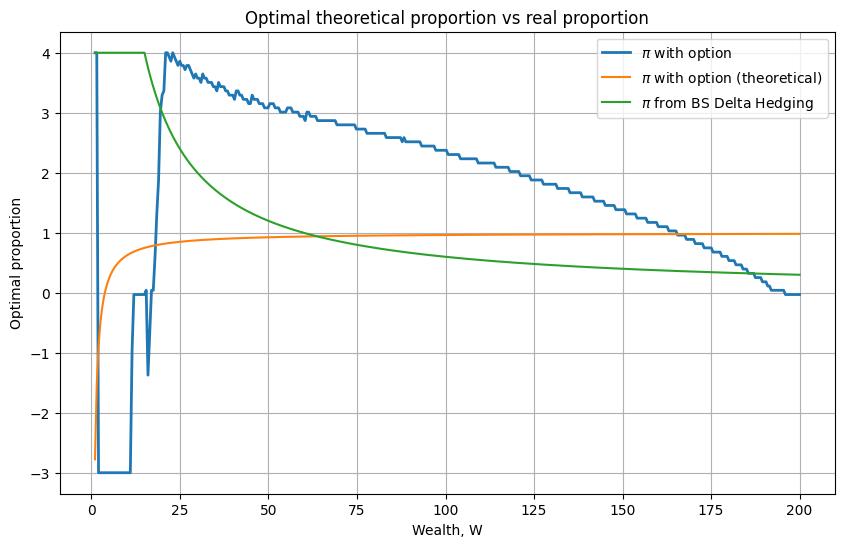

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(W_grid, Pi_with_opt[(0, 0)], label='$\pi$ with option', lw=2)
plt.plot(W_grid, Pi_theo_opt[(0,0)], label="$\pi$ with option (theoretical)")
plt.plot(W_grid, Pi_delta_0, label = '$\pi$ from BS Delta Hedging')
plt.xlabel("Wealth, W")
plt.ylabel("Optimal proportion")
plt.title("Optimal theoretical proportion vs real proportion")
plt.legend()
plt.grid(True)
plt.show()

# 2 With transaction costs

## 2.1 With transaction costs and no option

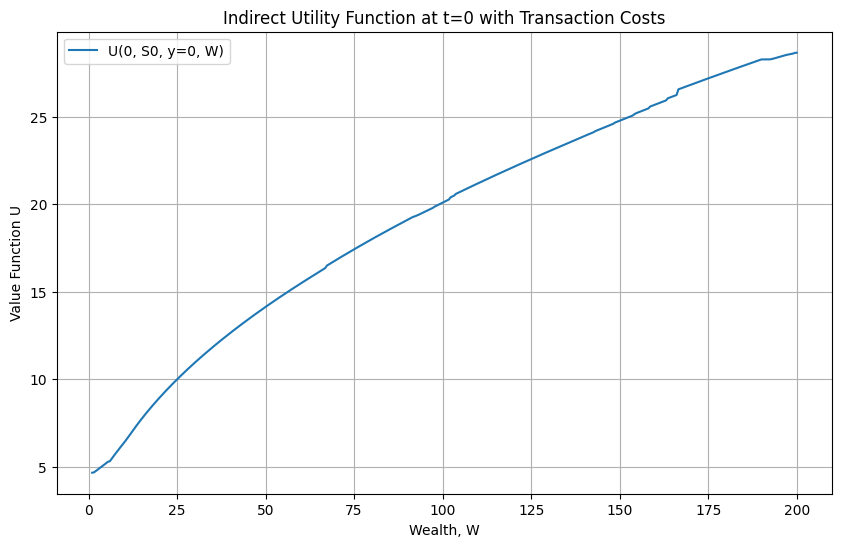

In [97]:
# ==============================
# Part 2: With Transaction Costs (Alternative Scheme)
# ==============================

# ------------------------------
# Dynamic Programming with Transaction Costs (Alternative Step-by-Step Scheme)
# ------------------------------
def solve_dp_with_transaction_cost(option=False):
    Delta_y = 1.0
    M = 10
    y_grid = np.arange(-M, M + 1) * Delta_y
    K_y = len(y_grid)
    N_y = K_y

    U = {}
    for i in range(N_t + 1):
        S_val = S0 * (u ** i) * (d ** (N_t - i))
        U[(N_t, i)] = np.zeros((N_y, N_W))
        for k, y in enumerate(y_grid):
            for j, W in enumerate(W_grid):
                option_payoff = max(S_val - K, 0) if option else 0.0
                liquidation = max(W + S_val * y - lambda_tc * S_val * abs(y) - option_payoff, 1e-8)
                U[(N_t, i)][k, j] = utility(liquidation)

    for n in reversed(range(N_t)):
        for i in range(n + 1):
            S_val = S0 * (u ** i) * (d ** (n - i))
            U_val = np.full((N_y, N_W), -1e10)
            for k, y in enumerate(y_grid):
                for j, W in enumerate(W_grid):
                    # No Transaction
                    W_nt = W * np.exp(r * dt)
                    j_nt = np.argmin(np.abs(W_grid - W_nt))
                    val_up = U[(n + 1, i + 1)][k, j_nt]
                    val_down = U[(n + 1, i)][k, j_nt]
                    val_nt = p * val_up + (1 - p) * val_down

                    # Buy
                    if k < N_y - 1:
                        W_buy = W - (1 + lambda_tc) * S_val * Delta_y
                        W_buy *= np.exp(r * dt)
                        if W_buy >= W_min:
                            j_b = np.argmin(np.abs(W_grid - W_buy))
                            val_buy_up = U[(n + 1, i + 1)][k + 1, j_b]
                            val_buy_down = U[(n + 1, i)][k + 1, j_b]
                            val_buy = p * val_buy_up + (1 - p) * val_buy_down
                        else:
                            val_buy = -1e10
                    else:
                        val_buy = -1e10

                    # Sell
                    if k > 0:
                        W_sell = W + (1 - lambda_tc) * S_val * Delta_y
                        W_sell *= np.exp(r * dt)
                        if W_sell <= W_max:
                            j_s = np.argmin(np.abs(W_grid - W_sell))
                            val_sell_up = U[(n + 1, i + 1)][k - 1, j_s]
                            val_sell_down = U[(n + 1, i)][k - 1, j_s]
                            val_sell = p * val_sell_up + (1 - p) * val_sell_down
                        else:
                            val_sell = -1e10
                    else:
                        val_sell = -1e10

                    U_val[k, j] = max(val_nt, val_buy, val_sell)

            U[(n, i)] = U_val

    return U, y_grid

# ------------------------------
# Solve and Plot Transaction Cost Case (Without Option)
# ------------------------------
U_tc, y_grid = solve_dp_with_transaction_cost(option=False)
k0 = len(y_grid) // 2

plt.figure(figsize=(10, 6))
plt.plot(W_grid, U_tc[(0,0)][k0,:], label="U(0, S0, y=0, W)")
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Indirect Utility Function at t=0 with Transaction Costs")
plt.legend()
plt.grid(True)
plt.show()

## 2.2 With option

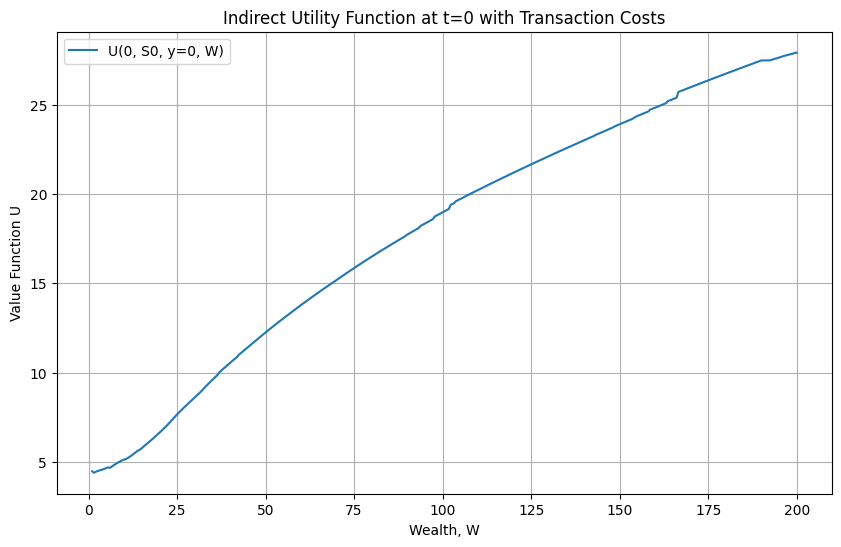

In [98]:
# ------------------------------
# Solve and Plot Transaction Cost Case (Option)
# ------------------------------
U_tc_opt, y_grid_opt = solve_dp_with_transaction_cost(option=True)
k0 = len(y_grid) // 2

plt.figure(figsize=(10, 6))
plt.plot(W_grid, U_tc_opt[(0,0)][k0,:], label="U(0, S0, y=0, W)")
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Indirect Utility Function at t=0 with Transaction Costs")
plt.legend()
plt.grid(True)
plt.show()

## 2.3 Indifference pricing

Optimal C = 10.921790500999318


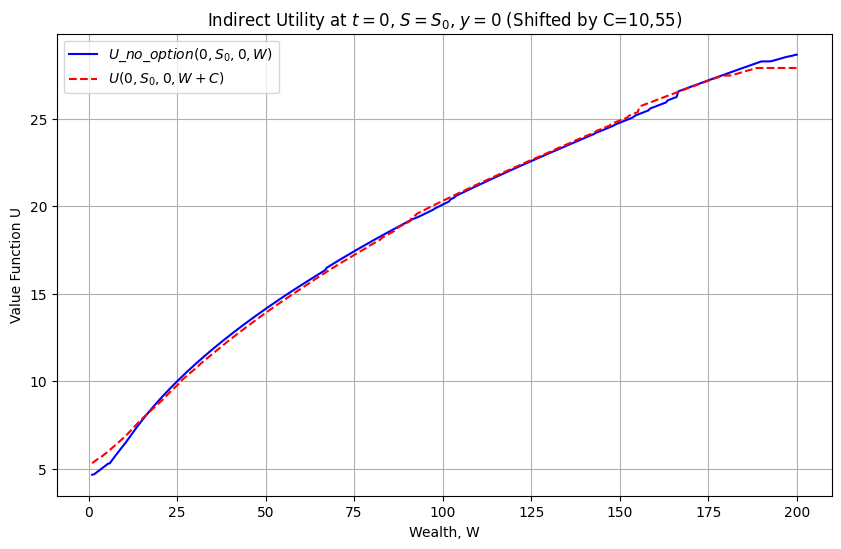

In [99]:
# ------------------------------
# Indifference Pricing with Transaction Costs (Corrected Shift Direction)
# ------------------------------

def shifted_utility_tc(C):
    W_shifted = W_grid + C
    U_shifted = np.interp(W_shifted, W_grid, U_tc_opt[(0, 0)][k0,:])
    error = np.sqrt(np.mean((U_shifted - U_tc[(0, 0)][k0,:])**2))
    return error

res = minimize_scalar(shifted_utility_tc, bounds=(0, 20), method='bounded')
C_optimal_tc = res.x
print("Optimal C =", C_optimal_tc)

C_tc = C_optimal_tc 
W_shifted = W_grid + C_tc
U_shifted = np.interp(W_shifted, W_grid, U_tc_opt[(0, 0)][k0, :])

plt.figure(figsize=(10,6))
plt.plot(W_grid, U_tc[(0,0)][k0,:], 'b-', label=r'$U\_no\_option(0,S_0,0,W)$')
plt.plot(W_grid, U_shifted, 'r--', label=r"$U(0,S_0,0,W+C)$")
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Indirect Utility at $t=0$, $S=S_0$, $y=0$ (Shifted by C=10,55)")
plt.legend()
plt.grid(True)
plt.show()

# 3 Comparison between no transaction costs case and tc case

## 3.1 Indirect utilities 

In [100]:
lambda_tc = 0.0

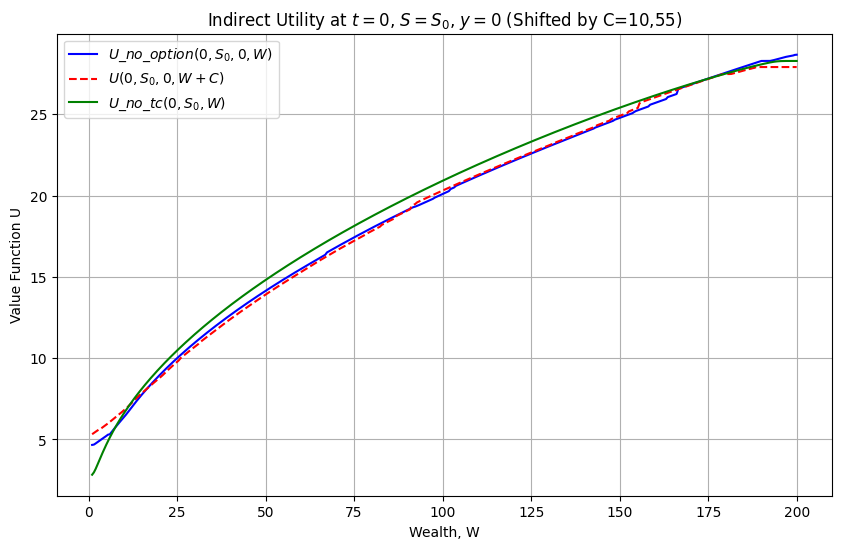

In [101]:
plt.figure(figsize=(10,6))
plt.plot(W_grid, U_tc[(0,0)][k0,:], 'b-', label=r'$U\_no\_option(0,S_0,0,W)$')
plt.plot(W_grid, U_shifted, 'r--', label=r"$U(0,S_0,0,W+C)$")
plt.plot(W_grid, U_no_opt[(0,0)], 'g-', label=r"$U\_no\_tc(0,S_0,W)$")
plt.xlabel("Wealth, W")
plt.ylabel("Value Function U")
plt.title("Indirect Utility at $t=0$, $S=S_0$, $y=0$ (Shifted by C=10,55)")
plt.legend()
plt.grid(True)
plt.show()

## 3.2 Prices

In [102]:
print('The indifference price in the absence of transaction costs is :',C)
print('The indifference price with transaction costs is :',C_tc)

The indifference price in the absence of transaction costs is : 7.676162037612947
The indifference price with transaction costs is : 10.921790500999318


## 3.3 Proportions with no option

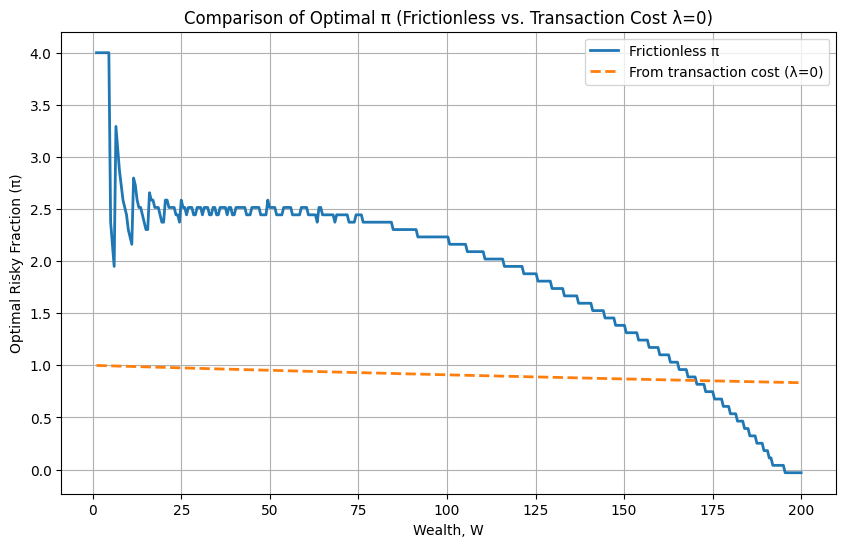

In [103]:
# ------------------------------
# Assumptions
# ------------------------------
W_min, W_max = 1.0, 200.0
N_W = 400
W_grid = np.linspace(W_min, W_max, N_W)
Delta_y = 1.0
M = 10
y_grid = np.arange(-M, M + 1) * Delta_y
S0 = 100
U_tc
Pi_no_opt


# ------------------------------
# Compute π from Transaction Cost (λ = 0)
# ------------------------------

U_matrix = U_tc[(0, 0)]  # shape (N_y, N_W)
k_star_indices = np.argmax(U_matrix, axis=0)
y_star = y_grid[k_star_indices]
Pi_tc_equiv = (y_star * S0) / (W_grid + y_star * S0)

# ------------------------------
# Plot Comparison
# ------------------------------
plt.figure(figsize=(10, 6))
plt.plot(W_grid, Pi_no_opt[(0, 0)], label='Frictionless π', lw=2)
plt.plot(W_grid, Pi_tc_equiv, '--', label='From transaction cost (λ=0)', lw=2)
plt.xlabel("Wealth, W")
plt.ylabel("Optimal Risky Fraction (π)")
plt.title("Comparison of Optimal π (Frictionless vs. Transaction Cost λ=0)")
plt.legend()
plt.grid(True)
plt.show()


## 3.4 Proportion with option

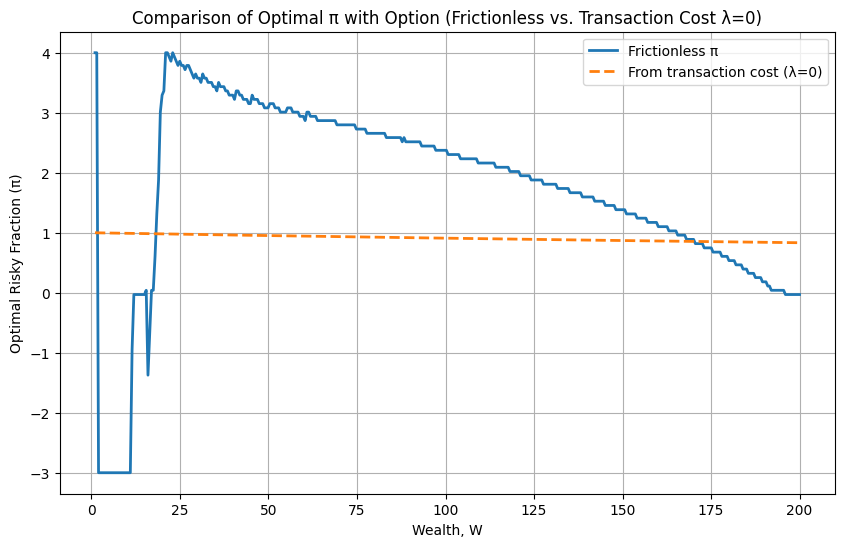

In [104]:
# ------------------------------
# Assumptions
# ------------------------------
W_min, W_max = 1.0, 200.0
N_W = 400
W_grid = np.linspace(W_min, W_max, N_W)
Delta_y = 1.0
M = 10
y_grid = np.arange(-M, M + 1) * Delta_y
S0 = 100
U_tc
Pi_no_opt


# ------------------------------
# Compute π from Transaction Cost (λ = 0)
# ------------------------------

U_matrix = U_tc_opt[(0, 0)]  # shape (N_y, N_W)
k_star_indices = np.argmax(U_matrix, axis=0) 
y_star = y_grid[k_star_indices]
Pi_tc_equiv = (y_star * S0) / (W_grid + y_star * S0)

# ------------------------------
# Plot Comparison
# ------------------------------
plt.figure(figsize=(10, 6))
plt.plot(W_grid, Pi_with_opt[(0, 0)], label='Frictionless π', lw=2)
plt.plot(W_grid, Pi_tc_equiv, '--', label='From transaction cost (λ=0)', lw=2)
plt.xlabel("Wealth, W")
plt.ylabel("Optimal Risky Fraction (π)")
plt.title("Comparison of Optimal π with Option (Frictionless vs. Transaction Cost λ=0)")
plt.legend()
plt.grid(True)
plt.show()
